In [1]:
import numpy as np 
import matplotlib.pyplot as plt

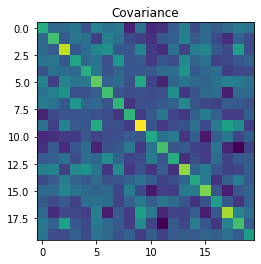

In [2]:
d = 20

cov_12 = np.random.randn(d, d)
cov = np.matmul(np.transpose(cov_12), cov_12)

for i in range(d): 
  cov_12[i, i] = 1.

cov_12_noise = np.random.randn(d, d)
for i in range(d): 
  cov_12_noise[i, i] = 1.

plt.imshow(cov)
plt.title('Covariance')
plt.show()


def data_generator(n=100, sigma_noise=0.):
  # Generate data with covariance: cov
  # Add noise with covariance, sigma_noise*cov_12_noise
  seed = np.random.randn(n, d)
  seed_noise = np.random.randn(n, d)
  return np.matmul(seed, cov_12) + sigma_noise*np.matmul(seed_noise, cov_12_noise)

x = data_generator(n=100)

In [3]:
from sklearn.decomposition import PCA

x = data_generator(n=10000)

pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

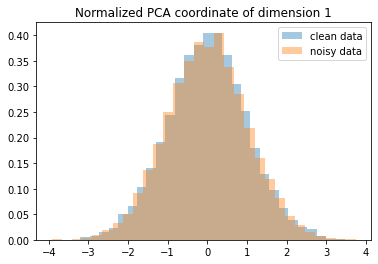

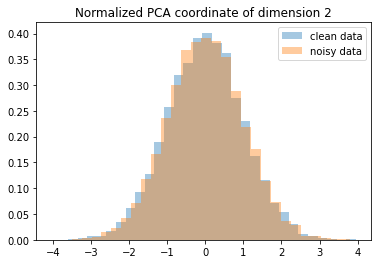

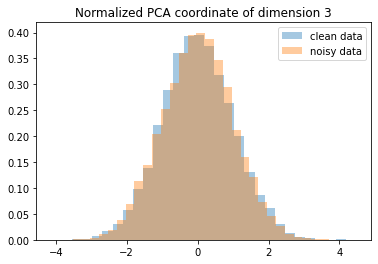

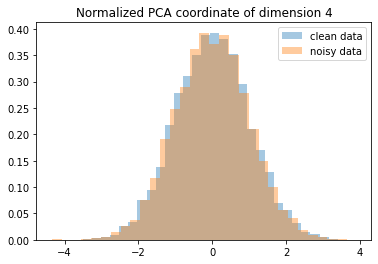

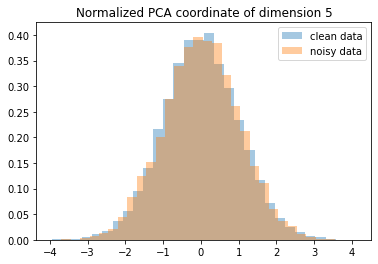

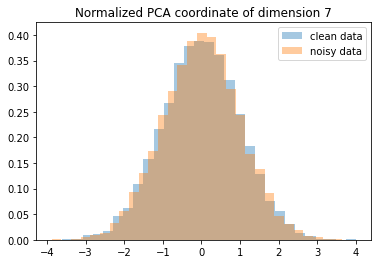

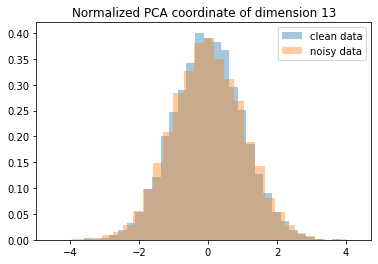

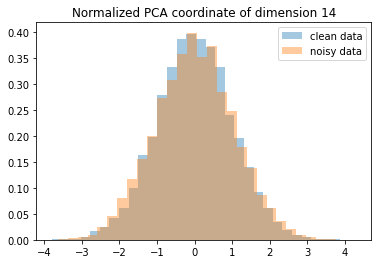

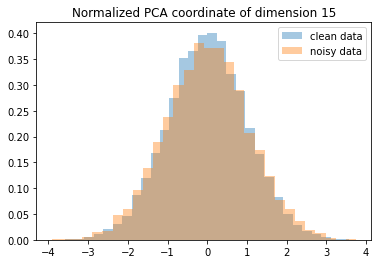

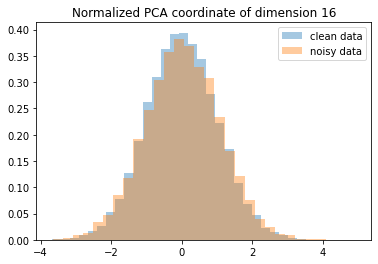

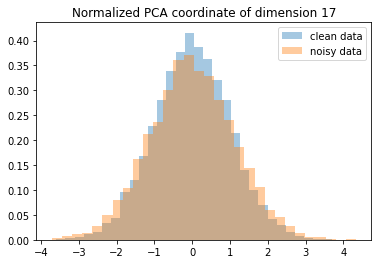

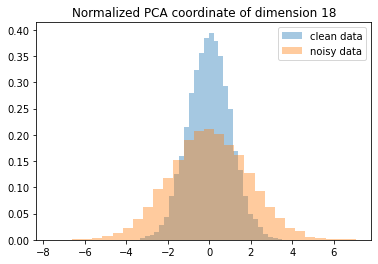

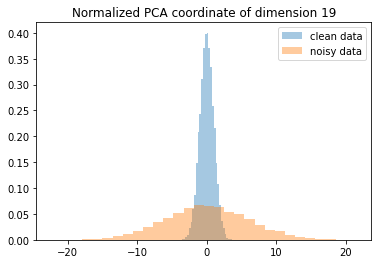

In [4]:
x_noisy = data_generator(n=10000, sigma_noise=0.1)

x_pca = pca.transform(x)
x_pca_noisy = pca.transform(x_noisy)

cov_ = pca.get_covariance()

sigma2 = np.sort(np.linalg.eig(cov_)[0])[::-1]

plt.plot(np.log(sigma2))
plt.title('Log eigen values of estimated covariance matrix')
plt.show()

for i in range(d):
  plt.hist(x_pca[:, i] / np.sqrt(sigma2[i]) , label='clean data', bins=30, alpha=0.4, density=True)
  plt.hist(x_pca_noisy[:, i] / np.sqrt(sigma2[i]) , label='noisy data', bins=30, alpha=0.4, density=True)
  plt.legend()
  plt.title('Normalized PCA coordinate of dimension ' + str(i))
  plt.show()